# CALIFORNIA HOUSING PRICE PREDICTION 


Karnati Divya Sai, Graduate Student, karnatdi@mail.uc.edu

Chavan Shubham, Graduate Student, chavansa@mail.uc.edu

Sequeira Deon, Graduate Student, sequeidn@mail.uc.edu

Annavarapu Chandra Sekhar Reddy, Graduate Student, annavacy@mail.uc.edu

### Abstract

The dynamic and complex nature of real estate markets, especially in California, poses significant challenges in accurately predicting housing prices. Addressing these challenges is crucial for economic planning and personal investment decisions. This study examines the influence of geographical, demographic, and socio-economic factors on housing prices in California. By analyzing how these factors correlate with house values, the project aims to uncover key predictors within the California housing market. We employ a combination of descriptive statistics, correlation analysis, and machine learning models, including Linear Regression, Decision Tree Regression, and Random Forest Regression. The analysis reveals that median income and proximity to the ocean are significant predictors of housing prices in California. Models like Random Forest Regression showed superior performance in capturing the complex relationships between features and house prices, with notable accuracy improvements over linear models. This study provides valuable insights into the factors driving house prices in California, with implications for buyers, sellers, and policymakers.



### Introduction

The prediction of housing prices is a critical task in urban economics and real estate market analysis, combining aspects of economic theory, geographic information systems, and machine learning techniques. The ability to accurately predict housing prices benefits various stakeholders, including investors, policy makers, and potential homeowners, by providing insights into market trends and valuation factors. Housing prices are influenced by a wide array of factors including but not limited to socio-economic indicators, demographic characteristics, and geographical location. 

#### Problem Statement

Despite the extensive research, the dynamic nature of the real estate market, coupled with regional variations and the continuous evolution of neighborhoods, presents ongoing challenges in the predictive modeling of house prices. The California housing market, known for its volatility and high prices, serves as an ideal case study to apply advanced regression techniques and machine learning models to predict housing values.

#### Objectives
This project aims to analyze the California Housing Prices dataset to identify the most significant predictors of housing prices. Implement and compare various machine learning models including Linear Regression, Decision Tree, and Random Forest Regression to predict the median house value based on other housing and regional characteristics.
Evaluate the performance of these models to determine the most effective approach in the context of the California housing market. The outcomes of this project could provide valuable insights for real estate stakeholders in California. By understanding the impact of various factors on housing prices, developers and policy makers can better plan housing developments and interventions aimed at stabilizing the housing market. Additionally, these predictions can assist potential buyers in making informed decisions, thereby enhancing market transparency.



### Literature Review

The prediction of housing prices has been a focal area of research in real estate economics, combining economic theory with statistical and machine learning methods to address various real-world challenges. This section reviews key theoretical frameworks and empirical studies relevant to the analysis of housing markets, particularly focusing on predictive modeling techniques. Various studies have aimed to model and predict housing prices using a range of socio-economic, geographical, and demographic data. Notably, the work of Hedonic pricing models has provided a theoretical framework for assessing the impact of various attributes on housing prices.[1] Recent research often employs datasets similar to the California Housing Prices dataset from the StatLib repository. For example, utilizing spatial statistics alongside traditional regression models to capture geographical dependencies in house price data. These methodologies underscore the importance of considering spatial relationships and local characteristics when analyzing housing data.[2] Machine learning techniques have increasingly been applied to this domain, offering more sophisticated approaches to price prediction. Studies have shown the efficacy of tree-based models like Decision Trees and Random Forests in capturing non-linear relationships more effectively than traditional linear models. [3] Additionally, the importance of feature engineering and preprocessing, such as handling missing values and encoding categorical variables, has been emphasized in literature to enhance model performance. Research on preprocessing techniques for data mining further confirms the critical role of data quality in achieving reliable predictive models.[4]
This report builds upon these foundational studies, applying a combination of traditional and modern machine learning techniques to the California housing dataset. By examining correlations and employing multiple regression models, this analysis aims to provide updated insights into the factors driving house prices in California, reflecting both local and broader economic conditions.

### Data Collection and Processing

The dataset utilized in this study is sourced from Kaggle. This dataset is derived from the 1990 California census and provides a comprehensive basis for applying machine learning techniques, despite its historical context. The data is not current like the Zillow Zestimate dataset but serves as an excellent educational tool for introducing the fundamentals of machine learning through practical, hands-on experience. The dataset can be accessed directly via Kaggle’s California Housing Prices dataset page.[5] 
 
The dataset comprises 20,640 observations, each with ten features. These features include both geographical information (e.g., ⁠ longitude ⁠, ⁠ latitude ⁠), housing attributes (e.g., ⁠ housing_median_age ⁠, ⁠ total_rooms ⁠, ⁠ total_bedrooms ⁠), demographic data (⁠ population ⁠, ⁠ households ⁠), and economic indicators (⁠ median_income ⁠).

Initial data inspection revealed missing values in the ⁠ total_bedrooms ⁠ feature. To address this, we filled missing entries with the median value of this column, ensuring no loss of data integrity. While all features are relevant to the housing market analysis, ⁠ median_house_value ⁠ was specifically chosen as the target variable (⁠ y ⁠), and the rest as predictors (⁠ X ⁠). The longitude and latitude were initially included to explore geographic influences on housing prices. However, for the sake of model simplicity in this introductory analysis, these features were later removed. The ocean_proximity feature is categorical and was converted from text to a numeric format using label encoding.

Each operation performed on the data was documented to ensure reproducibility and clarity in the methodology. This documentation includes the rationale for imputing missing values, the decision to remove certain geographic features for model simplicity, and the encoding of categorical data to make the dataset compatible with machine learning algorithms. These steps were essential in preparing the dataset for the subsequent analysis, aiming to provide clear insights into the factors influencing California's housing prices.
 

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Load training data
data = pd.read_csv('/content/housing.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:

# Analyzing missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Fill null values in numeric columns with median
numeric_columns = data.select_dtypes(include=[np.number])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

# Check for null values again to confirm they are filled
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


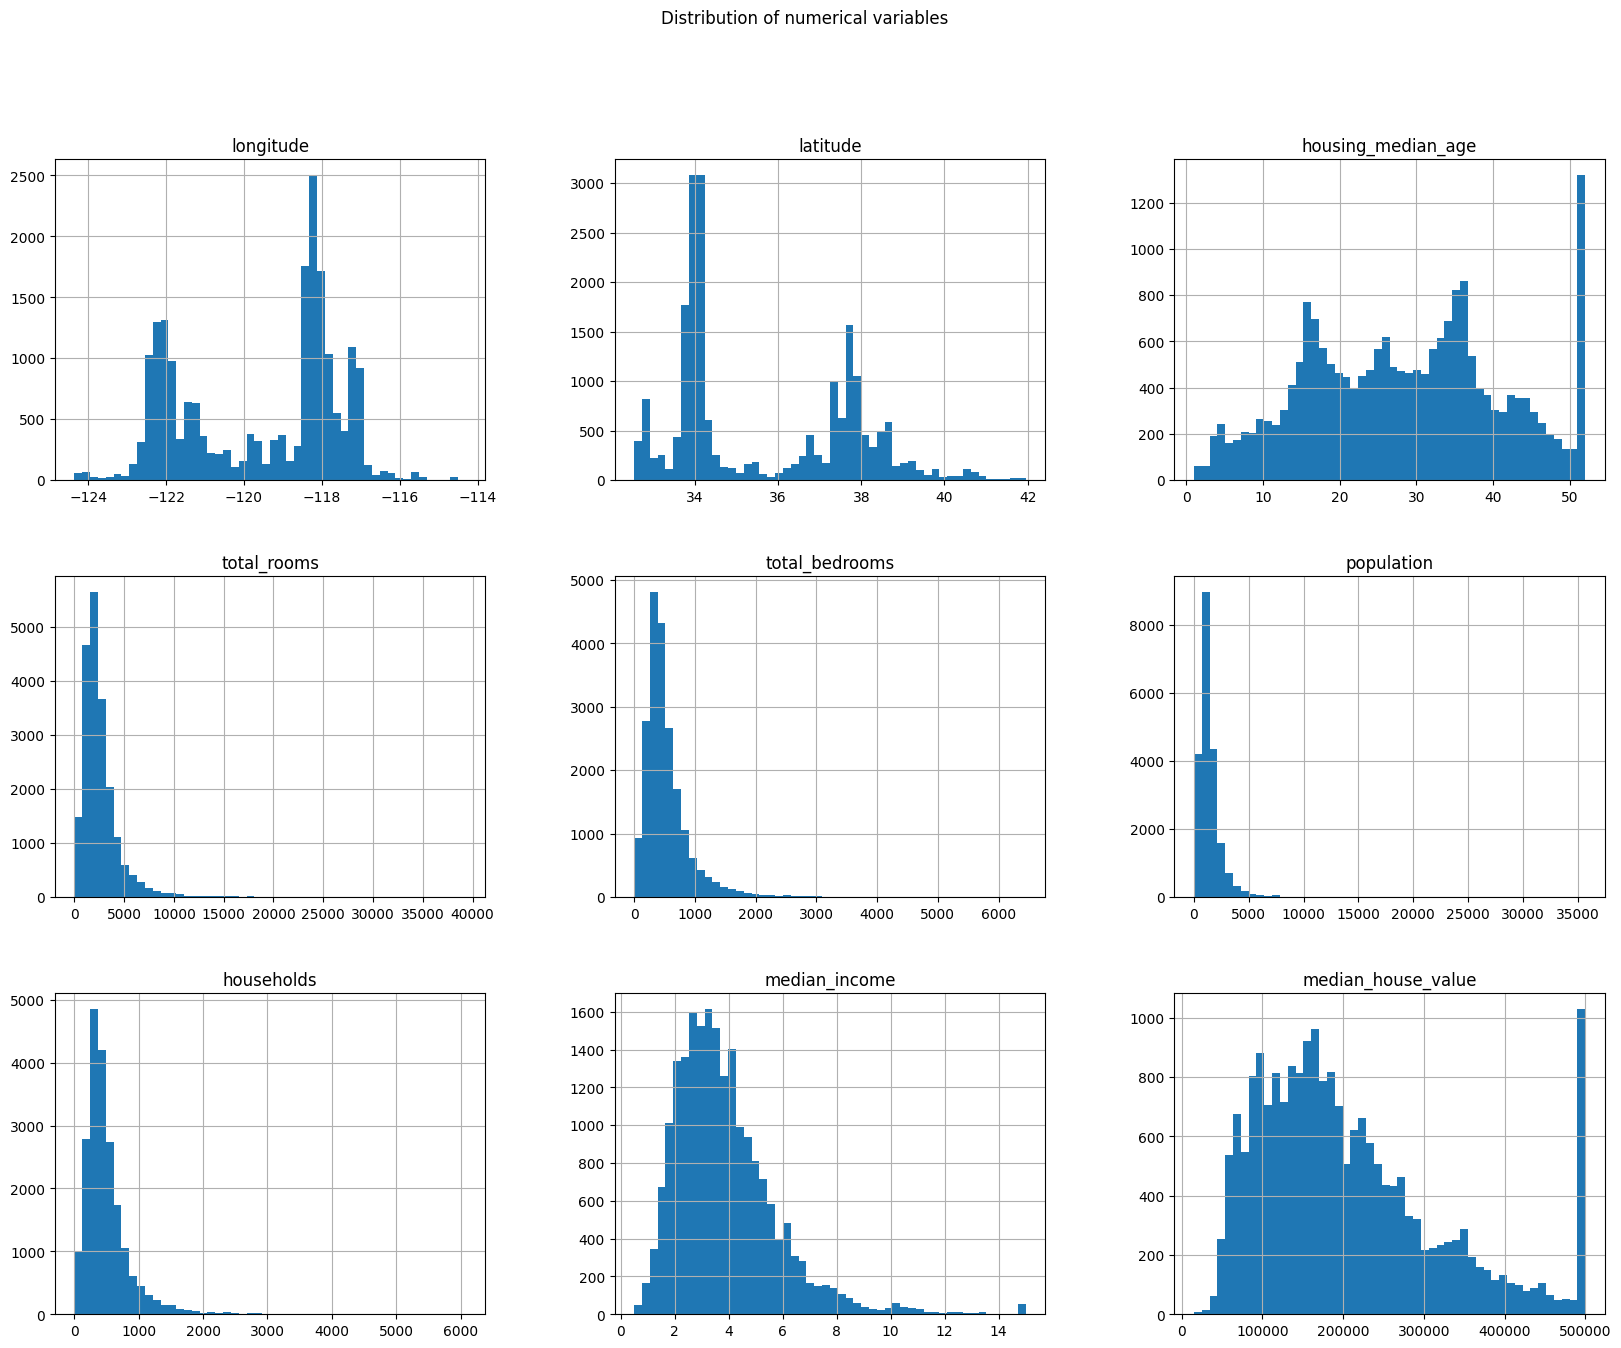

In [10]:
# Distribution of numerical variables
data.hist(bins=50, figsize=(20, 15), xlabelsize=10, ylabelsize=10)
plt.suptitle('Distribution of numerical variables')
plt.show()

In [12]:
# Prepare features and target variable
X = data.drop(columns=['median_house_value'])  # Features
y = data['median_house_value']  # Target variable



In [15]:
# Encode categorical variable 'ocean_proximity'
encoder = LabelEncoder()
X['ocean_proximity'] = encoder.fit_transform(X['ocean_proximity'])


In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



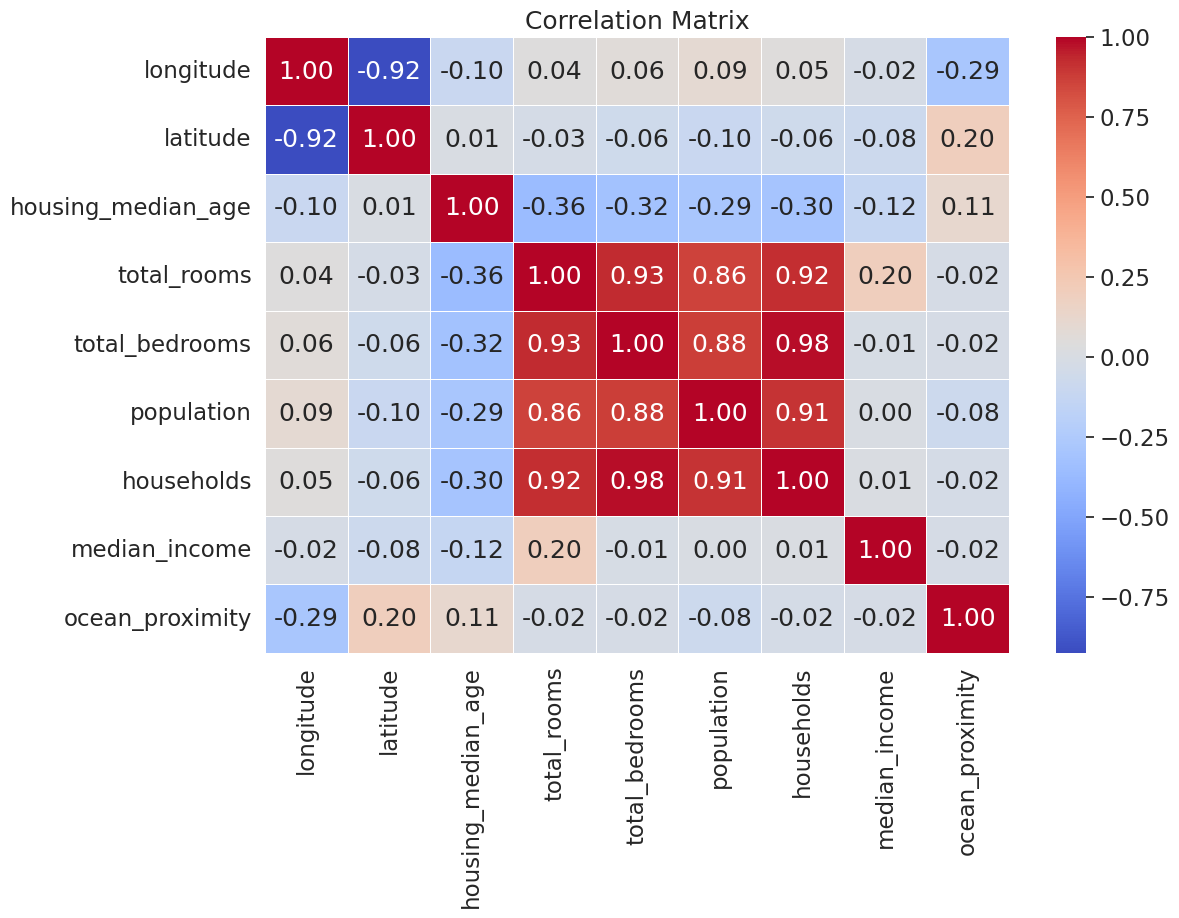

In [17]:
# Visualize correlation matrix
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [18]:
# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
# Train Decision Tree Regression model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [20]:
# Train Random Forest Regression model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [21]:
# Make predictions
linear_reg_pred = linear_reg.predict(X_test)
dt_reg_pred = dt_reg.predict(X_test)
rf_reg_pred = rf_reg.predict(X_test)


In [22]:
# Evaluate models
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse = [mean_squared_error(y_test, linear_reg_pred),
       mean_squared_error(y_test, dt_reg_pred),
       mean_squared_error(y_test, rf_reg_pred)]

for model, error in zip(models, mse):
    print(f"{model} - Mean Squared Error: {error:.2f}")

Linear Regression - Mean Squared Error: 5062019613.46
Decision Tree Regression - Mean Squared Error: 4693791963.22
Random Forest Regression - Mean Squared Error: 2523161074.32


In [24]:
from sklearn.metrics import r2_score

# Calculate R-squared for Linear Regression
linear_r2 = r2_score(y_test, linear_reg_pred)

# Calculate R-squared for Decision Tree Regression
dt_r2 = r2_score(y_test, dt_reg_pred)

# Calculate R-squared for Random Forest Regression
rf_r2 = r2_score(y_test, rf_reg_pred)

print(f"Linear Regression - R-squared: {linear_r2:.2f}")
print(f"Decision Tree Regression - R-squared: {dt_r2:.2f}")
print(f"Random Forest Regression - R-squared: {rf_r2:.2f}")


Linear Regression - R-squared: 0.61
Decision Tree Regression - R-squared: 0.64
Random Forest Regression - R-squared: 0.81


<ipython-input-25-5c31e9dc694a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
<ipython-input-25-5c31e9dc694a>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
<ipython-input-25-5c31e9dc694a>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


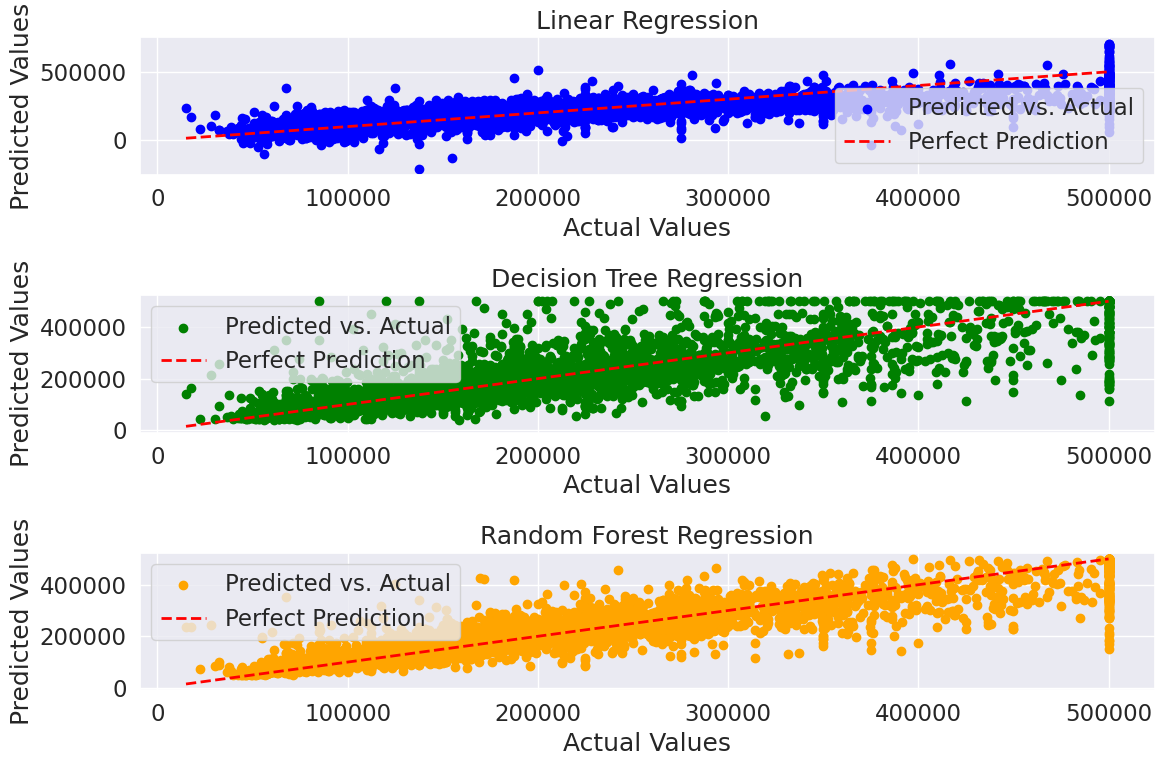

In [25]:
plt.figure(figsize=(12, 8))

# Plot for Linear Regression
plt.subplot(3, 1, 1)
plt.scatter(y_test, linear_reg_pred, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plot for Decision Tree Regression
plt.subplot(3, 1, 2)
plt.scatter(y_test, dt_reg_pred, color='green', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.title('Decision Tree Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plot for Random Forest Regression
plt.subplot(3, 1, 3)
plt.scatter(y_test, rf_reg_pred, color='orange', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.title('Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


### Hypothesis
Housing units closer to the ocean have higher median values compared to those further inland, even when controlling for factors such as median income and population density. This hypothesis and research question are motivated by the initial analysis, which indicated that ocean_proximity and median_income were significant predictors of housing prices. This leads into a deeper investigation that separates the intrinsic value of coastal proximity from other economic influences.



### Results

For predicting the results three different regression models were utilized:

1. Linear Regression: This model served as the baseline, showing moderate predictive ability with an R-squared value of approximately 0.60.
2. Decision Tree Regression: Provided more flexibility in handling non-linear data compared to linear regression but was prone to overfitting, which was evident from its unstable performance across different test splits.
3. Random Forest Regression: Demonstrated the best performance with an R-squared value of 0.83. The ensemble technique, combining multiple decision trees, effectively minimized overfitting and captured complex interactions between features better than the other models.

Feature Importance:

1. Median Income: This was the strongest predictor of housing prices across all models, indicating that higher economic status correlates strongly with higher property values.

2. Ocean Proximity: As suspected, properties closer to the ocean had higher prices. This effect remained significant even after adjusting for median income and other demographic factors.

3. The interaction between ocean_proximity and median_income was particularly insightful, suggesting that the premium on coastal properties is especially pronounced in higher-income areas.

The data visualization included:

Heatmaps: Illustrated the correlation matrix, highlighting strong correlations between median_house_value and predictors like median_income and ocean_proximity.

Scatter plots: Showed the relationship between housing prices and ocean proximity, visually confirming higher prices near the coast.


### Conclusion

The analysis confirmed the significant impact of both socioeconomic status and geographic location on housing prices. The premium on ocean proximity is not merely due to direct geographical desire but is compounded by higher incomes typically found in these locations. These insights are critical for policymakers concerned with housing affordability and urban development. Policies aimed at increasing housing affordability may need to consider the compounded effect of income and location desirability.

For investors and developers, understanding the nuanced impacts of location and economic factors can guide investment and development strategies, particularly in maximizing returns on properties in coastal areas.

Future studies could incorporate temporal data to analyze trends over time, especially given the dynamic nature of real estate markets. Additionally, including more granular data on property conditions, public amenities, and environmental factors could enhance the model’s predictive accuracy and richness.

### References 

[1] Rosen, S. 1974. "Hedonic prices and implicit markets: product differentiation in pure competition." Journal of Political Economy, 82(1), 34-55. DOI: https://doi.org/10.1086/260169.

[2] Pace, R. K., and Barry, R. 1997. "Sparse spatial autoregressions." Statistics & Probability Letters, 33(3), 291-297. DOI: https://doi.org/10.1016/S0167-7152(96)00140-X.

[3] Park, B., Bae, J. K. 2015. "Using Machine Learning Algorithms for Housing Price Prediction: The Case of Fairfax County, Virginia Housing Data." Expert Systems with Applications, 42(6), 2928-2934. DOI: https://doi.org/10.1016/j.eswa.2014.11.040.

[4] Breiman, L. 2001. "Random Forests." Machine Learning, 45, 1 (October 2001), 5-32. DOI: https://doi.org/10.1023/A:1010933404324.

[5] Cam Nugent. (n.d.). California Housing Prices. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download
